# $$MIA \quad notes$$
Pablo Laso Mielgo

---

# Image Filters
 * **Spatial Domain** (pixels) --> convolution with a mask/kernel (sliding a filter window over an image).
 * **Frequency Domain** (FT).
 
 $\rightarrow$ Designed to either remove a type of
noise or to enhance certain aspects of the image, by means of a **mask**, i.e., a two-dimensional
square window, that moves across the image affecting only one pixel at a
time. Each number in the filter is known as a coefficient. Yields a mask-sized matrix reduced to a number by a math operation that depends on the type of filter used. <p>
$\rightarrow$ A portion of the filter will lie outside, so we create pixel values outside the boundary in a process called **padding** [constant,
reflect, nearest, mirror, wrap].

### Nonlinear Filters * 
\* (except mean filter)

### Mean 
$\checkmark \quad$ Removes noise <br>
$\checkmark \quad$ Brightens <br>
$X\quad$ Blurring <br>
$X\quad$ Reduces spatial resolution

In [105]:
import cv2
import numpy as np
import scipy.ndimage
from PIL import Image

im_in= r'C:\Users\pablo\Downloads\to be erased/ultrasound_muscle.png'
im_out= r'C:\Users\pablo\Downloads\to be erased/mean_output.png'

# Opening the image using cv2.
a = cv2.imread(im_in)
# Converting the image to grayscale.
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

# Initializing the filter of size 5 by 5.
# The filter is divided by 25 for normalization.
k = np.ones((5,5))/25 
# performing convolution
b = scipy.ndimage.filters.convolve(a, k)
# Writing b to a file.
cv2.imwrite(im_out, b)

True

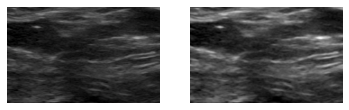

In [71]:
import imageio
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()
plt.show()

---

### Median
$\checkmark \quad$ Eliminates **salt-and-pepper** noise (black-and-white dots).

In [81]:
'''import cv2
import numpy as np
import scipy.ndimage'''

im_in= r'C:\Users\pablo\Downloads\to be erased/ct_saltandpepper.png'
mean_out= r'C:\Users\pablo\Downloads\to be erased/mean_output.png'

# Opening the image using cv2.
a = cv2.imread(im_in)
# Converting the image to grayscale.
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

# Initializing the filter of size 5 by 5.
# The filter is divided by 25 for normalization.
k = np.ones((5,5))/25
# performing convolution
b = scipy.ndimage.filters.convolve(a, k)
# Writing b to a file.
cv2.imwrite(im_out, b)

True

In [92]:
'''import cv2
import numpy as np
import scipy.ndimage'''

im_in= r'C:\Users\pablo\Downloads\to be erased/ct_saltandpepper.png'
median_out= r'C:\Users\pablo\Downloads\to be erased/median_output.png'

# Opening the image using cv2.
a = cv2.imread(im_in)
# Converting the image to grayscale.
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Performing the median filter.
b = scipy.ndimage.filters.median_filter(a, size=3)

# Writing b to a file.
cv2.imwrite(im_out, b)

True

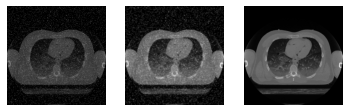

In [93]:
import imageio
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3)
im1 = imageio.imread(im_in)
im2 = imageio.imread(mean_out)
im3 = imageio.imread(median_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[2].imshow(im3, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
plt.show()
plt.show()

---

### Min & Max
* Takes (minimum) value, now as half-way value. $\quad \rightarrow \quad$ Now the minimum (darkest value) is just a mid-range grey value (darkest vaue is now much more darker so, image in general in now much more darker). <p>
$\checkmark \quad$ Image gets (darker).

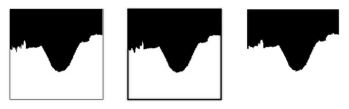

In [100]:
'''import cv2
import scipy.ndimage

import imageio
import matplotlib.pyplot as plt'''

im_in= r'C:\Users\pablo\Downloads\to be erased/wave.png'
min_out= r'C:\Users\pablo\Downloads\to be erased/min_output.png'
max_out= r'C:\Users\pablo\Downloads\to be erased/max_output.png'

# opening the image and converting it to grayscale
a = cv2.imread(im_in)

# performing minimum filter
b = scipy.ndimage.filters.minimum_filter(a, size=5)
# saving b as mino.png
cv2.imwrite(min_out, b)

# performing maximum filter
b = scipy.ndimage.filters.maximum_filter(a, size=5)
# saving b as mino.png
cv2.imwrite(max_out, b)

fig, axes = plt.subplots(nrows=1, ncols=3)
im1 = imageio.imread(im_in)
im2 = imageio.imread(min_out)
im3 = imageio.imread(max_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[2].imshow(im3, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
plt.show()

---

## Derivative filters: 
### First Derivative Filters

#### Sobel and Prewitt
* Noise enhancement (Prewitt > Sobel, since Sobel weights higher central pixels, thus avoiding blurring). <p>
$\checkmark \quad$ Edge detection.

#### Canny
* **Gaussian** (not implemented $\rightarrow$ [GaussianBlur()](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)).
* set **variance** in each axis (introduces noise).
* finds **ridges** (maximums in derivative).
* **thresholds** for classifing pixels in weak (between th_min and th_max) and strong (above th_max) edge pixels. 
    * Increasing th_max will make for less strong edge pixels to be connected and, therefore, less connections and less edges detected. 
    * Decreasing th_min will make for more weak edge pixels to be connected and, therefore, more connections and more edges detected. 
* *connect* weak and strong edge pixels. A high **variance** value will make edges to intensify edge-connections (less edges detected), whereas a low value will make a lot of connections, while increasing noise, too, however.<p>
$\checkmark \quad$ Edge detection. <br>
$X \quad$ Computationally expensive.

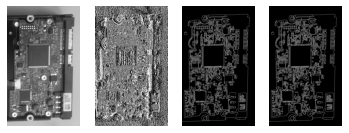

In [29]:
'''import cv2
from scipy import ndimage'''
from skimage import filters

im_in= r'C:\Users\pablo\Downloads\to be erased/cir.png'
sobel_out= r'C:\Users\pablo\Downloads\to be erased/sobel_output.png'
prewitt_out= r'C:\Users\pablo\Downloads\to be erased/prewitt_output.png'
canny_out= r'C:\Users\pablo\Downloads\to be erased/canny_output.png'

# Opening the image.
a = cv2.imread(im_in)
# Converting a to grayscale .
a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Performing Sobel filter.
b = scipy.ndimage.sobel(a)
# Saving b.
cv2.imwrite(sobel_out, b)


# Performing vertical Prewitt 
##### change Prewitt for sobel_v etc
b = filters.prewitt(a)
min_b, max_b = b.min(), b.max()
b = 255*(b-min_b)/(max_b-min_b)
# Saving b .
cv2.imwrite(prewitt_out, b)

# Performing Canny edge filter.
b = cv2.Canny(a, 0, 300)
# Saving b.
cv2.imwrite(canny_out, b) 


fig, axes = plt.subplots(nrows=1, ncols=4)
im1 = imageio.imread(im_in)
im2 = imageio.imread(sobel_out)
im3 = imageio.imread(prewitt_out)
im3 = imageio.imread(canny_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[2].imshow(im3, cmap='gray')
axes[3].imshow(im3, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')
plt.show()

---

## Linear Filters *
\* (Mean filter missing)

## Derivative filters
### Second derivative
#### Laplacian 
$\checkmark \quad $Edge detection.<br>
$X \quad $Noise enhanced in first derivative. <br>
$X \quad $Noise intensified in second derivative.

#### Laplacian of Gaussian (LoG)
$\checkmark \quad $Edge detection. <br>
$X \quad $Noise enhanced in first derivative. <br>
$X \quad $Computationally expensive. 

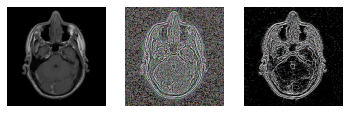

In [39]:
import cv2
import scipy.ndimage

im_in= r'C:\Users\pablo\Downloads\to be erased/vhuman_t1.png' #r'C:\Users\pablo\Downloads\to be erased/imagefor_laplacian.png'
laplacian_out= r'C:\Users\pablo\Downloads\to be erased/Laplacian_out.png'
laplacianGaussian_out= r'C:\Users\pablo\Downloads\to be erased/LaplacianGaussian_out.png'

# Opening the image.
a = cv2.imread(im_in)
# Performing Laplacian filter.
b = scipy.ndimage.filters.laplace(a,mode='reflect')
cv2.imwrite(laplacian_out,b)   

# Opening the image.
a = cv2.imread(im_in)
# Performing Laplacian filter.
b = scipy.ndimage.filters.gaussian_laplace(a,sigma=1 ,mode='reflect')
cv2.imwrite(laplacianGaussian_out,b)   

fig, axes = plt.subplots(nrows=1, ncols=3)
im1 = imageio.imread(im_in)
im2 = imageio.imread(laplacian_out)
im3 = imageio.imread(laplacianGaussian_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[2].imshow(im3, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
plt.show()

---

## Shape detecting
### Frangi filter

$\checkmark \quad $ Shape detection (**vessel-like** shapes).

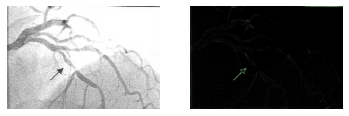

>> output must needs be enhanced for visualization


In [38]:
import cv2
import numpy as np

import numpy as np
from PIL import Image
from skimage.filters import frangi

im_in= r'C:\Users\pablo\Downloads\to be erased/angiogram1.png'
Frangi_out= r'C:\Users\pablo\Downloads\to be erased/frangi_out.png'


img = cv2.imread(im_in)
img1 = np.asarray(img)
img2 = frangi(img1, black_ridges=True)
img3 = 255*(img2-np.min(img2))/(np.max(img2)-np.min(img2))
cv2.imwrite(Frangi_out, img3)

fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = imageio.imread(im_in)
im2 = imageio.imread(Frangi_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()
plt.show()
print('>> output must needs be enhanced for visualization')

<ipython-input-69-00aeae809f81>:21: RuntimeWarning: divide by zero encountered in log
  b4 = np.log(b2)*gamma
<ipython-input-69-00aeae809f81>:39: RuntimeWarning: divide by zero encountered in log
  b4 = np.log(b2)*gamma


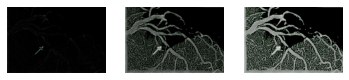

In [69]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


im_in= Frangi_out
im_out= r'C:\Users\pablo\Downloads\to be erased/gamma_output.png'


# Opening the image.
a = cv2.imread(im_in)
# gamma is initialized.
gamma = 0.25
# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized 
b2 = b1/b3
# gamma-correction exponent is computed.
b4 = np.log(b2)*gamma
# gamma-correction is performed.
c = np.exp(b4)*255.0
# c is converted to type int.
c1 = c.astype(int)
cv2.imwrite(im_out, c1)

# Opening the image.
a = cv2.imread(im_in)
# gamma is initialized.
gamma = 0.125
# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized 
b2 = b1/b3
# gamma-correction exponent is computed.
b4 = np.log(b2)*gamma
# gamma-correction is performed.
c = np.exp(b4)*255.0
# c is converted to type int.
c1 = c.astype(int)
cv2.imwrite(im_out_2, c1)


import imageio
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
im3 = imageio.imread(im_out_2)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[2].imshow(im3, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
plt.show()

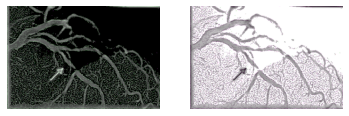

In [70]:
import cv2


im_in= im_out
im_out= r'C:\Users\pablo\Downloads\to be erased/inverse_output.png'

# Opening the image.
im = cv2.imread(im_in)
# Performing the inversion operation
im2 = 255 - im
# Saving the image as imageinverse_output.png in
# Figures folder.
cv2.imwrite(im_out, im2)

import imageio
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()
plt.show()

<ipython-input-71-df2f6d310e93>:21: RuntimeWarning: divide by zero encountered in log
  b4 = np.log(b2)*gamma


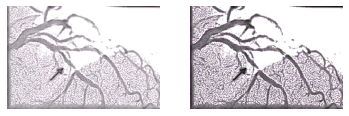

In [71]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


im_in= im_out
im_out= r'C:\Users\pablo\Downloads\to be erased/gamma_output.png'


# Opening the image.
a = cv2.imread(im_in)
# gamma is initialized.
gamma = 2
# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized 
b2 = b1/b3
# gamma-correction exponent is computed.
b4 = np.log(b2)*gamma
# gamma-correction is performed.
c = np.exp(b4)*255.0
# c is converted to type int.
c1 = c.astype(int)
cv2.imwrite(im_out, c1)


import imageio
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()

---

---

## Enhancement

* Transform the pixel values in the input
image to a new value in the output image using a **mapping** function.

---
### Inversion

* Linear transformation $\rightarrow$ change brightness. <br>
$\checkmark \quad $  Surpresses bright spots (metal objects) while enhanceing others like vessels.<br>

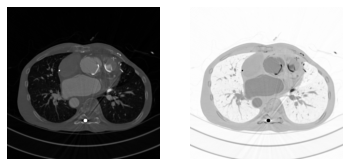

In [14]:
import cv2


im_in= r'C:\Users\pablo\Downloads\to be erased/imageinverse_input.png'
im_out= r'C:\Users\pablo\Downloads\to be erased/inverse_output.png'

# Opening the image.
im = cv2.imread(im_in)
# Performing the inversion operation
im2 = 255 - im
# Saving the image as imageinverse_output.png in
# Figures folder.
cv2.imwrite(im_out, im2)

import imageio
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()
plt.show()

---
### Power law transformation (Gamma correction)

$$ t(i, j) = \quad  k \cdot I(i, j)^γ \quad \rightarrow \rightarrow \quad t(i, j) = \quad e^{γ∗ln(I_{norm})} $$

 * Equivalent to **logarithmic**:
* $γ>1 \quad \rightarrow$ darker.
* $γ<1 \quad \rightarrow$ brighther

<ipython-input-35-a44e75a1eded>:22: RuntimeWarning: divide by zero encountered in log
  b4 = np.log(b2)*gamma
<ipython-input-35-a44e75a1eded>:40: RuntimeWarning: divide by zero encountered in log
  b4 = np.log(b2)*gamma


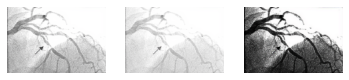

In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


im_in= r'C:\Users\pablo\Downloads\to be erased/angiogram1.png'
im_out= r'C:\Users\pablo\Downloads\to be erased/gamma_output.png'
im_out_2= r'C:\Users\pablo\Downloads\to be erased/gamma2_output.png'


# Opening the image.
a = cv2.imread(im_in)
# gamma is initialized.
gamma = 0.5
# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized 
b2 = b1/b3
# gamma-correction exponent is computed.
b4 = np.log(b2)*gamma
# gamma-correction is performed.
c = np.exp(b4)*255.0
# c is converted to type int.
c1 = c.astype(int)
cv2.imwrite(im_out, c1)

# Opening the image.
a = cv2.imread(im_in)
# gamma is initialized.
gamma = 5
# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized 
b2 = b1/b3
# gamma-correction exponent is computed.
b4 = np.log(b2)*gamma
# gamma-correction is performed.
c = np.exp(b4)*255.0
# c is converted to type int.
c1 = c.astype(int)
cv2.imwrite(im_out_2, c1)


import imageio
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
im3 = imageio.imread(im_out_2)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[2].imshow(im3, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
plt.show()

---
### Histogram Equalization

* Makes the **CDF** of the hisotgram increase linearly. <br>
* Spreads out the pixel intensities by rescaling the histogram.<br>
$\checkmark \quad $  Enhances contrast.

1. The histogram of the input image is normalized so that the range
of the normalized histogram is [0, 1].
2. Probability of a gray-level value,
denoted by $p_x(i)$, is the ratio of the number of pixels with a gray value i to the total number of pixels in the image.
3. $ h(u) = round [\frac{C(u) − C_{min}}{1 − C_{min}} \cdot (L − 1) ]$

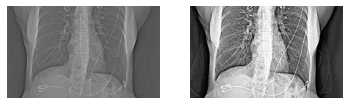

In [37]:
import cv2
import numpy as np 

im_in= r'C:\Users\pablo\Downloads\to be erased/hequalization_input.png'
im_out= r'C:\Users\pablo\Downloads\to be erased/hequalization_output.png'

# Opening the image.
img1 = cv2.imread(im_in)
# 2D array is converted to a 1D array.
fl = img1.flatten()
# Histogram and the bins of the image are computed.
hist,bins = np.histogram(img1,256,[0,255])
# cumulative distribution function is computed 
cdf = hist.cumsum()
# Places where cdf=0 is masked or ignored and 
# rest is stored in cdf_m.
cdf_m = np.ma.masked_equal(cdf,0)
# Histogram equalization is performed.
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# The masked places in cdf_m are now 0.
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# cdf values are assigned in the flattened array.
im2 = cdf[fl]
# im2 is 1D so we use reshape command to.
#  make it into 2D. 
im3 = np.reshape(im2,img1.shape)
# Saving im3 as hequalization_output.png
# in Figures folder 
cv2.imwrite(im_out, im3)

fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()

---
#### Contrast Limited Adaptive Histogram Equalization (CLAHE)
* Same as **Histogram Equalization**, but **locally** (using subimages).

0 100


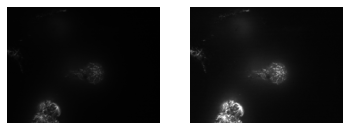

In [86]:
import cv2

im_in= r'C:\Users\pablo\Downloads\to be erased/embryo.png'
im_out= r'C:\Users\pablo\Downloads\to be erased/clahe_output.png'

# Opening the image.
im = cv2.imread(im_in)
# Finding the maximum and minimum pixel values
b = 100 # im.max() # = 206, but doesnt brighten image enough
a = im.min()
print(a,b)
# Converting im1 to float.
c = im.astype(float)
# Contrast stretching transformation.
im1 = 255.0*(c-a)/(b-a+0.0000001)
# Saving im2 as contrast_output.png in
# Figures folder 
cv2.imwrite(im_out, im1) 

fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()

---
###  Contrast Stretching
* similar in idea to **Histogram Equalization**
except that the pixel intensities are rescaled using the pixel values
instead of probabilities and CDF.

* increase the pixel value range by
rescaling the pixel values 

* $$ t(i, j) = 255 \cdot \frac{I(i, j) − a}{b − a} $$

7 51


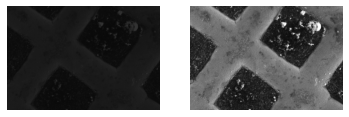

In [96]:
import cv2

im_in= r'C:\Users\pablo\Downloads\to be erased/bse.png'
im_out= r'C:\Users\pablo\Downloads\to be erased/contrastStretching_output.png'


# Opening the image.
im = cv2.imread(im_in)
# Finding the maximum and minimum pixel values
b = im.max()
a = im.min()
print(a,b)
# Converting im1 to float.
c = im.astype(float)
# Contrast stretching transformation.
im1 = 255.0*(c-a)/(b-a+0.0000001)
# Saving im2 as contrast_output.png in
# Figures folder 
cv2.imwrite(im_out, im1) 

fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()

---
###  Sigmoid Correction
* enhancing images around a central cutoff.
* $$ S(x) = 1.0
1 + e^{−(cutof f−pixelvalue))\cdot gain} $$
* The *gain* param makes the sigmoid function grow faster from 0 to 1. The higher the gain, the more saturation towards 0 or 1.

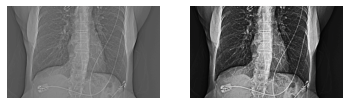

In [106]:
import cv2
from skimage.exposure import adjust_sigmoid

im_in= r'C:\Users\pablo\Downloads\to be erased/hequalization_input.png'
im_out= r'C:\Users\pablo\Downloads\to be erased/sigmoid_output.png'

# Reading the image.
img1 = cv2.imread(im_in)
# Applying Sigmoid correction.
img2 =  adjust_sigmoid(img1, gain=15)
# Saving img2.
cv2.imwrite(im_out, img2)

fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()

---
### Local Contrast Normalization

* enhances the pixel value at a certain
location based only on its neighboring pixels.
 <br>
$\checkmark \quad $  especially well for
highlighting high-contrast objects surrounded by low-contrast structures.

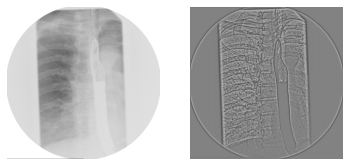

In [113]:
import pydicom
import numpy as np
import skimage.exposure as imexp
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from PIL import Image

im_in= r'C:\Users\pablo\Downloads\to be erased/FluroWithDisplayShutter.dcm'
im_out= r'C:\Users\pablo\Downloads\to be erased/localnorma_output.png'


def localfilter(im, sigma=(10, 10,)):
    im_gaussian = gaussian_filter(im, sigma=sigma[0])
    d = im_gaussian-im
    s = np.sqrt(gaussian_filter(d*d, sigma=sigma[1]))
    # form an array where all elements have a value of mean(s)
    mean_array = np.ones(s.shape)*np.mean(s)
    # find element by element maximum between mean_array and s
    max_array = np.maximum(mean_array, s)
    y = d/(max_array+np.spacing(1.0))
    return y

file_name = im_in
dfh = pydicom.read_file(file_name, force=True)
im = dfh.pixel_array
# convert to float and scale before applying filter
im = im.astype(np.float)
im1 = im/np.max(im)

sigma = (5, 5,)
im2 = localfilter(im, sigma) 
# rescale to 8-bit
im3 = 255*(im2-im2.min())/(im2.max()-im2.min())

im4 = Image.fromarray(im3).convert("L")
im4.save(im_out)
#im4.show()

fig, axes = plt.subplots(nrows=1, ncols=2)
im1 = imageio.imread(im_in)
im2 = imageio.imread(im_out)
axes[0].imshow(im1, cmap='gray')
axes[1].imshow(im2, cmap='gray')
axes[0].axis('off')
axes[1].axis('off')
plt.show()

---

---

<div class="alert alert-block alert-warning">
<b>Author:</b> $$Pablo \quad Laso \quad Mielgo$$
</div>